# Significance testing

In this notebook we use the results of the notebook "Extracting and implementing structural features of winning tickets" to test our hypothesees. Our Hypotheees are:  
1. Weight distribution pruning performs better than random pruning.
2. Positional probability pruning performs better than random pruning.
3. Adapting the sign ratio leads to better performance for each pruning type.
4. The winning ticket conv1 layer outperforms all other conditions

## Load and plot accuracies

In [1]:
# imports

import numpy as np
import matplotlib.pyplot as plt
import random
import scipy

In [2]:
# load the results from before

all_accuracies = np.load("experiment_accuracies.npy")
print(all_accuracies.shape, ": (conditions, models, epochs)")

(7, 1, 2) : (conditions, models, epochs)


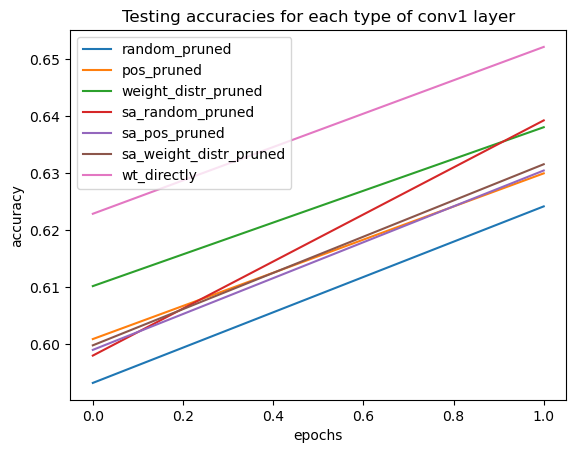

In [3]:
# plot the mean performances for all conditions

all_conditions = ["random_pruned","pos_pruned","weight_distr_pruned","sa_random_pruned","sa_pos_pruned","sa_weight_distr_pruned", "wt_directly"]

for accuracies, condition in zip(all_accuracies,all_conditions):
    # calculate the mean performance over the models in one condition
    mean_accuracies = np.mean(accuracies, axis=0)
    plt.plot(mean_accuracies, label=condition)

    
# show the plot with the mean accuracies
plt.legend()
plt.xlabel('epochs')  
plt.ylabel('accuracy')  
plt.title('Testing accuracies for each type of conv1 layer') 
plt.show()

## Perform paired samples t-test

In [5]:
# test hypothesis 1 and its opposite
random_pruning_acc = np.concatenate([all_accuracies[0],all_accuracies[3]]).flatten()
weight_distr_pruned_acc = np.concatenate([all_accuracies[2],all_accuracies[5]]).flatten()
scipy.stats.ttest_rel(random_pruning_acc, weight_distr_pruned_acc, alternative="less")

TtestResult(statistic=-1.0984542969970432, pvalue=0.1761303159816869, df=3)

In [6]:
# test hypothesis 2 and its opposite
random_pruning_acc = np.concatenate([all_accuracies[0],all_accuracies[3]]).flatten()
pos_pruned_acc = np.concatenate([all_accuracies[1],all_accuracies[4]]).flatten()
scipy.stats.ttest_rel(random_pruning_acc, pos_pruned_acc, alternative="less")

TtestResult(statistic=-0.3863517445945436, pvalue=0.3625043916379176, df=3)

In [7]:
# test hypothesis 3 and its opposite
without_sa = np.concatenate([all_accuracies[0],all_accuracies[1],all_accuracies[2]]).flatten()
with_sa = np.concatenate([all_accuracies[3],all_accuracies[4],all_accuracies[5]]).flatten()
scipy.stats.ttest_rel(without_sa, with_sa, alternative="less")

TtestResult(statistic=-0.07258557335668918, pvalue=0.4724750286308167, df=5)

In [8]:
# test hypothesis 4 and its opposite
not_wt_directly = all_accuracies[:6].flatten()
wt_directly = all_accuracies[[6]*6].flatten()
scipy.stats.ttest_rel(not_wt_directly,wt_directly, alternative="less")

TtestResult(statistic=-13.346690975566142, pvalue=1.9353095344329847e-08, df=11)